# Segunda lista - Problema grupal 1

## Componentes del grupo

* Pol Casacuberta Gil
* Joaquin Faraone Prieto
* Agnès Felip i Díaz
* Marta Granero i Martí

## Predicción del uso de bicicletas

### El uso compartido de bicicletas es un servicio proporcionado por cualquier ciudad importante del mundo, por lo que comprender y predecir el comportamiento del sistema es un elemento clave. Vamos a trabajar con el conjunto de datos de bicicletas compartidas del repositorio de conjuntos de datos de UCI que recopila estadísticas agregadas de uso de bicicletas junto con otra información adicional relevante. Se pueden descargar los datos desde aquí [https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

### El objetivo de este problema es predecir cúantas bicicletas se usarán diáriamente (el archivo day.csv). Podéis leer en el $\texttt{Readme.txt}$ los detalles sobre las variables

### Procedamos con los ejercicios que se nos piden

#### a) El primer paso es preprocesar y preparar los datos antes de ajustar cualquier modelo. Hay algunas variables que no són útiles para el problema o que no tiene sentido usar. Eliminad-las del conjunto de datos. Dividid los datos en conjuntos de entrenamiento y test $(60\%/40\%)$. Haced una exploración mínima del conjunto de datos de entrenamiento observando las relaciones entre las variables, especialmente con la variable objetivo. Describid las cosas que hayáis visto que os parezcan interesantes. Estandarizad las variables(calculad el estandarizador a partir de los datos del entrenamiento y luego aplicadlo a los datos de test).

In [1]:
# Descomentar para actualizar librerias
# Si se actualiza alguna libreria hay que reiniciar el notebook
# !pip install pandas --upgrade --user --quiet
# !pip install numpy --upgrade --user --quiet
# !pip install scipy --upgrade --user --quiet
# !pip install statsmodels --upgrade --user --quiet
# !pip install scikit-learn --upgrade --user --quiet
# !pip install plotly --upgrade --user --quiet
# !pip install apafib --upgrade --user --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pandas.plotting import scatter_matrix

from sklearn import datasets
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
bicicletas_data = pd.read_csv("./Bike-Sharing-Dataset/day.csv", header=0, delimiter=',')
bicicletas_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bicicletas_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2011-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


In [5]:
# no hay datos faltantes
# posible datos inecesarios 
# season, yr, mnth, holiday, weekday, workingday (embutidos en fecha)  
bicicletas_data.drop(columns=['yr', 'instant' , 'dteday'], inplace=True) # ejemplo, me cargo year
bicicletas_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896
hum,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500
windspeed,731.0,0.190486,0.077498,0.022392,0.134950,0.180975,0.233214,0.507463


In [6]:
bicicletas_train, bicicletas_test = train_test_split(bicicletas_data, test_size=0.4, random_state=0)
bicicletas_train.shape, bicicletas_test.shape

((438, 13), (293, 13))

In [7]:
for col in bicicletas_train.columns:
  print(col)

season
mnth
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


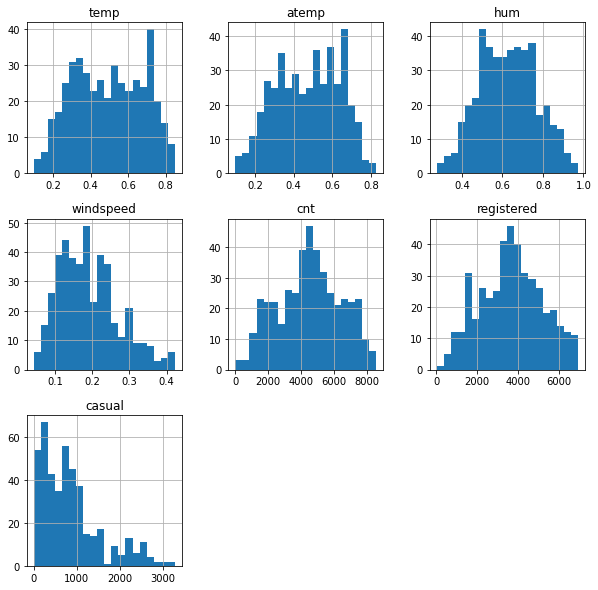

In [8]:
bicicletas_train.loc[:,['temp','atemp', 'hum', 'windspeed', 'cnt', 'registered' , 'casual']].hist(bins=20, figsize=(10,10));

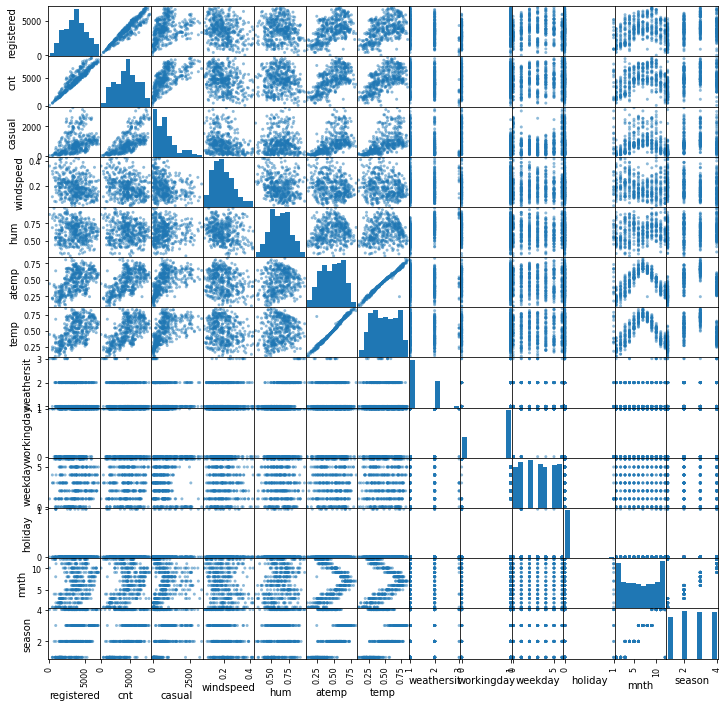

In [9]:
scatter_matrix(bicicletas_train.loc[:,['registered', 'cnt', 'casual', 'windspeed','hum', 'atemp','temp', 'weathersit','workingday', 'weekday', 'holiday' , 'mnth' , 'season' ]],figsize=(12,12));

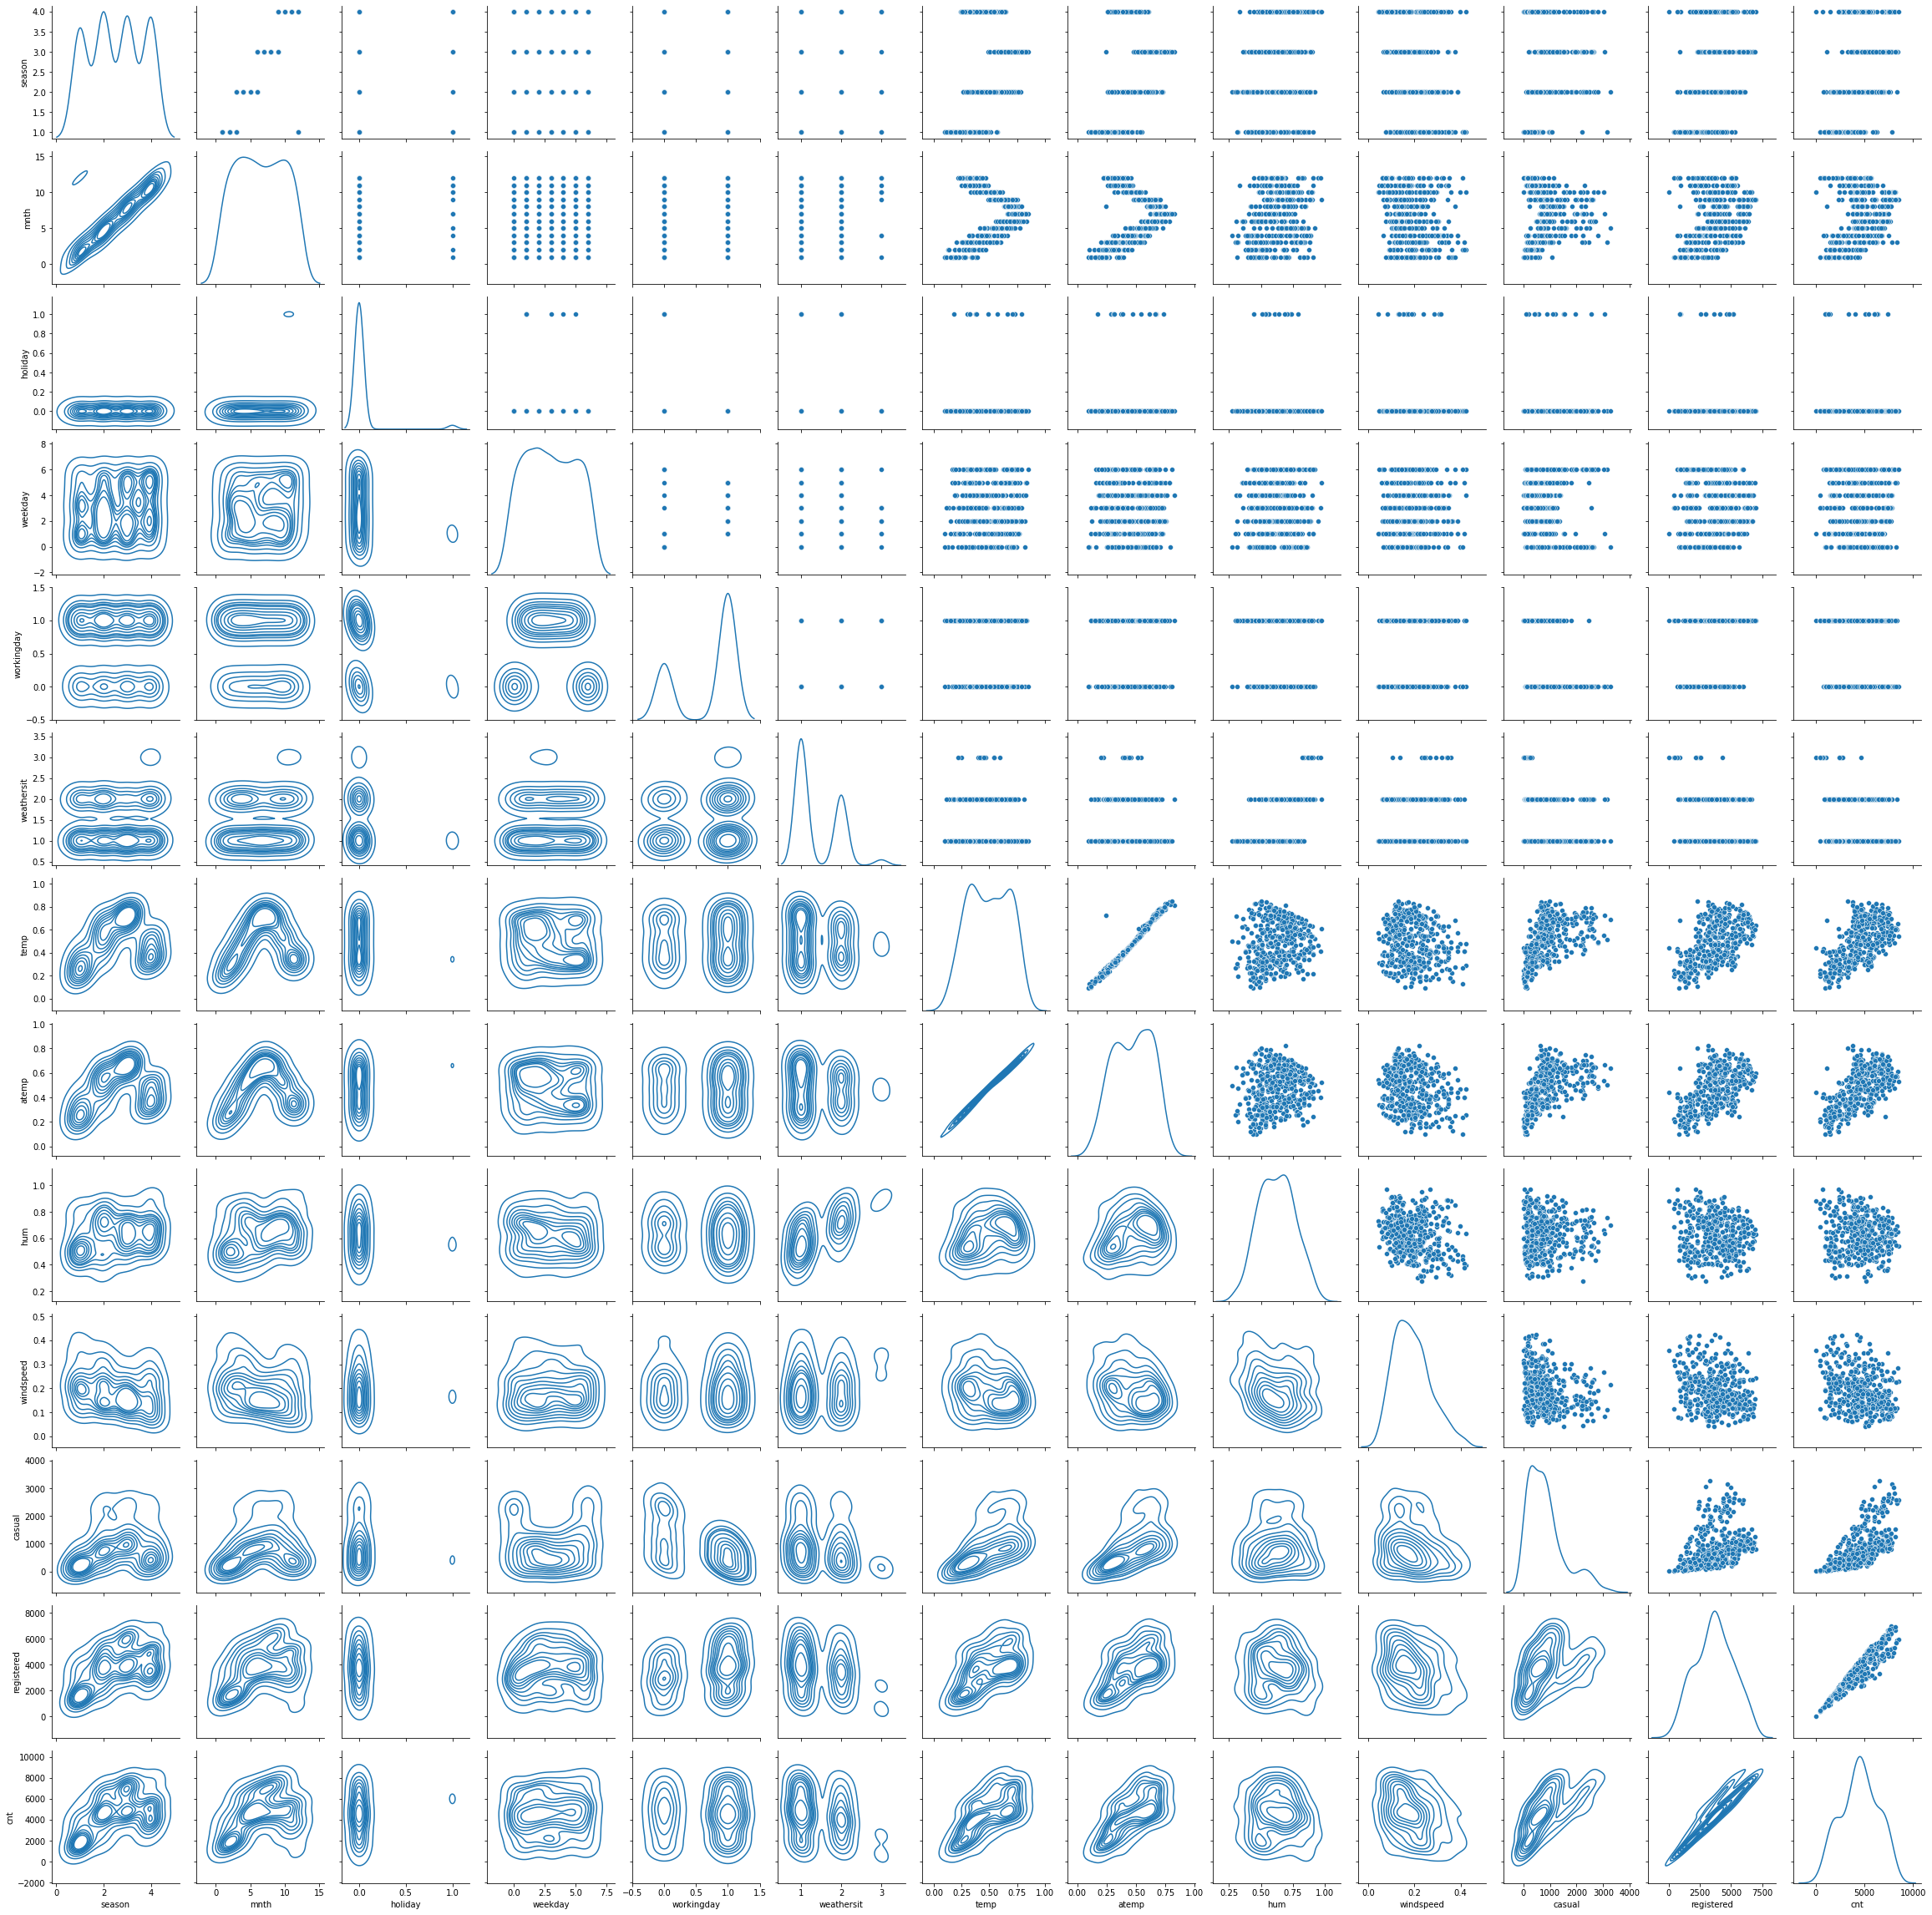

In [10]:
g = sns.PairGrid(bicicletas_train, diag_sharey=False)
g.map_upper(sns.scatterplot);
g.map_lower(sns.kdeplot);
g.map_diag(sns.kdeplot);

In [11]:
# Podemos ver que algunas variables muestra cierta relacion con otras. Por ejemplo atemp y temp muestran
# un comportamiento muy marcado con mnth y con season. 
# A su vez temp y atemp muestan un realacion lineal entre ellas es evidente asi como tambien entre mnth y
# season.

# con nuestra variable de interes "cnt" podemos ver como hay una relacion con "regstered" y con "casual". 
# tambien vemos un comportamiento tendencioso de "cnt" frente a las variables "weekday" y "mnth". En la 
# se favorecen los valores 0 y 6 (probablemtne sabado y domingo) y en "mnth" hay un aumento de 0 a 6 - 7 
# para volver a disminuir entre 8 y 11

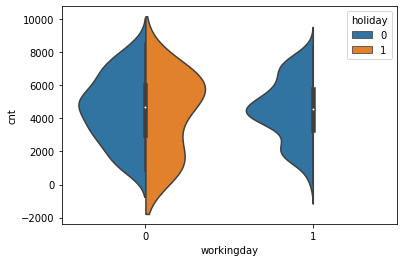

In [12]:
sns.violinplot(data=bicicletas_train, x= "workingday", y="cnt", hue = "holiday", split=True);  

In [13]:
# De la evaluacion de los datos tambien encontramos informacion puntuales como es el caso mostrado arriba. 
# El grafico muestra como en un dia de trabajo (no festivo) el numero de la variable de interes "cnt" es 
# Practicamente nulo

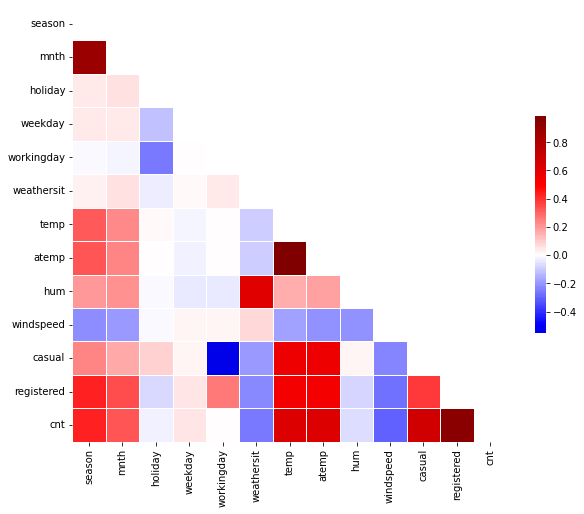

In [14]:
corr = bicicletas_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [15]:
dummies = pd.get_dummies(bicicletas_train['mnth'], drop_first=True, prefix='mnth', prefix_sep='_')
bicicletas_train = pd.concat([bicicletas_train,dummies], axis=1)
bicicletas_train.drop(columns=['mnth'], inplace=True)

dummies = pd.get_dummies(bicicletas_train['season'], drop_first=True, prefix='season', prefix_sep='_')
bicicletas_train = pd.concat([bicicletas_train,dummies], axis=1)
bicicletas_train.drop(columns=['season'], inplace=True)

dummies = pd.get_dummies(bicicletas_train['weekday'], drop_first=True, prefix='weekday', prefix_sep='_')
bicicletas_train = pd.concat([bicicletas_train,dummies], axis=1)
bicicletas_train.drop(columns=['weekday'], inplace=True)

dummies = pd.get_dummies(bicicletas_train['weathersit'], drop_first=True, prefix='weathersit', prefix_sep='_')
bicicletas_train = pd.concat([bicicletas_train,dummies], axis=1)
bicicletas_train.drop(columns=['weathersit'], inplace=True)
bicicletas_train.head()


,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_2,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
107,0,1,0.512500,0.503146,0.542500,0.163567,669,2760,3429,0,...,0,0,1,0,0,0,0,0,0,0
133,0,0,0.520833,0.500629,0.922500,0.134950,902,2507,3409,0,...,0,0,0,0,0,0,0,1,1,0
418,0,1,0.454167,0.444446,0.554583,0.190913,516,4546,5062,1,...,0,0,0,0,0,1,0,0,0,0
223,0,1,0.708333,0.654042,0.415000,0.125621,1051,3854,4905,0,...,1,0,0,0,0,0,1,0,0,0
549,0,1,0.780833,0.702650,0.492083,0.126237,1052,5608,6660,0,...,1,0,0,1,0,0,0,0,0,0


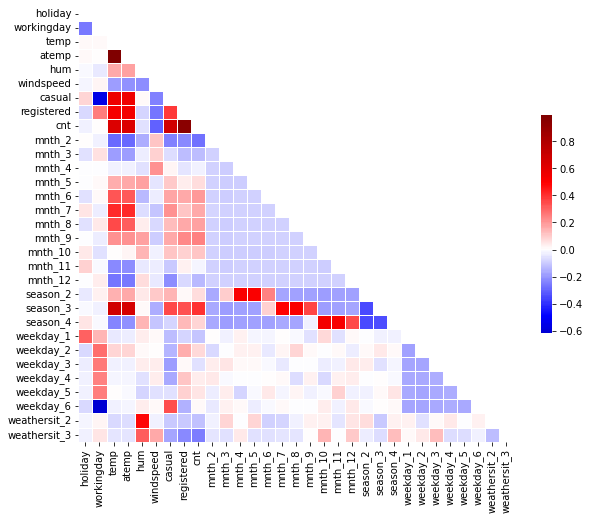

In [16]:
corr = bicicletas_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [17]:
# Estandarizar
data_columns = ['temp','atemp', 'hum', 'windspeed', 'cnt', 'registered' , 'casual']
bicicletas_train[data_columns].describe()

,temp,atemp,hum,windspeed,cnt,registered,casual
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.492820,0.471296,0.625692,0.191545,4527.315068,3675.728311,851.586758
std,0.184933,0.165077,0.141134,0.080060,1897.885708,1520.047483,695.647785
min,0.096522,0.098839,0.275833,0.042304,22.000000,20.000000,2.000000
25%,0.334375,0.335731,0.513958,0.130134,3253.500000,2546.000000,311.000000
50%,0.492917,0.480408,0.625000,0.182527,4594.000000,3718.000000,711.500000
75%,0.655417,0.608916,0.729479,0.236937,5902.500000,4759.750000,1080.000000
max,0.849167,0.826371,0.972500,0.422275,8555.000000,6946.000000,3283.000000


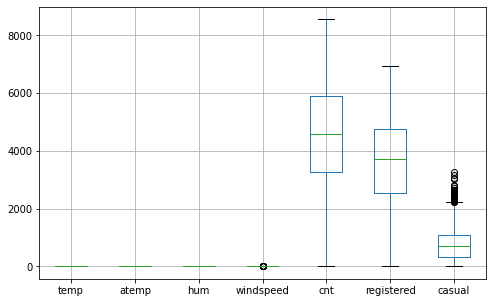

In [18]:
fig, ax = plt.subplots(figsize=(8,5));
bicicletas_train[data_columns].boxplot();

In [19]:
bicicletas_train_standarized = bicicletas_train.copy()
bicicletas_train_standarized[data_columns] = StandardScaler().fit_transform(bicicletas_train[data_columns])
bicicletas_train_standarized.describe().T

,count,mean,std,min,25%,50%,75%,max
holiday,438.0,2.968037e-02,0.169898,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,438.0,6.917808e-01,0.462286,0.000000,0.000000,1.000000,1.000000,1.000000
temp,438.0,3.244487e-17,1.001144,-2.145376,-0.857745,0.000528,0.880226,1.929103
atemp,438.0,5.231736e-16,1.001144,-2.258847,-0.822163,0.055261,0.834622,2.153429
hum,438.0,1.247100e-16,1.001144,-2.481745,-0.792590,-0.004907,0.736221,2.460106
windspeed,438.0,-2.271141e-16,1.001144,-1.866236,-0.767930,-0.112763,0.567628,2.885261
casual,438.0,-1.419463e-17,1.001144,-1.222685,-0.777987,-0.201606,0.328722,3.499175
registered,438.0,9.327901e-17,1.001144,-2.407759,-0.744069,0.027841,0.713965,2.153888
cnt,438.0,2.230585e-17,1.001144,-2.376575,-0.671943,0.035177,0.725416,2.124622
mnth_2,438.0,7.305936e-02,0.260531,0.000000,0.000000,0.000000,0.000000,1.000000


In [20]:
dummies = pd.get_dummies(bicicletas_test['mnth'], drop_first=True, prefix='mnth', prefix_sep='_')
bicicletas_test = pd.concat([bicicletas_test,dummies], axis=1)
bicicletas_test.drop(columns=['mnth'], inplace=True)

dummies = pd.get_dummies(bicicletas_test['season'], drop_first=True, prefix='season', prefix_sep='_')
bicicletas_test = pd.concat([bicicletas_test,dummies], axis=1)
bicicletas_test.drop(columns=['season'], inplace=True)

dummies = pd.get_dummies(bicicletas_test['weekday'], drop_first=True, prefix='weekday', prefix_sep='_')
bicicletas_test = pd.concat([bicicletas_test,dummies], axis=1)
bicicletas_test.drop(columns=['weekday'], inplace=True)

dummies = pd.get_dummies(bicicletas_test['weathersit'], drop_first=True, prefix='weathersit', prefix_sep='_')
bicicletas_test = pd.concat([bicicletas_test,dummies], axis=1)
bicicletas_test.drop(columns=['weathersit'], inplace=True)
bicicletas_test.head()

bicicletas_test_standarized = bicicletas_test.copy()
bicicletas_test_standarized[data_columns] = StandardScaler().fit_transform(bicicletas_test[data_columns])
bicicletas_test_standarized.describe().T

,count,mean,std,min,25%,50%,75%,max
holiday,293.0,2.730375e-02,0.163246,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,293.0,6.723549e-01,0.470158,0.000000,0.000000,1.000000,1.000000,1.000000
temp,293.0,2.758506e-16,1.001711,-2.443049,-0.874615,0.059845,0.864778,2.012040
atemp,293.0,5.486699e-16,1.001711,-2.504657,-0.805251,0.096307,0.808357,2.267352
hum,293.0,-2.667567e-16,1.001711,-4.374844,-0.738883,-0.002448,0.710885,2.296385
windspeed,293.0,-3.031326e-17,1.001711,-2.266023,-0.649478,-0.150201,0.492975,4.335182
casual,293.0,-6.668916e-17,1.001711,-1.239520,-0.771400,-0.171018,0.433823,3.814689
registered,293.0,-9.700242e-17,1.001711,-1.962963,-0.708274,-0.007997,0.729365,2.029791
cnt,293.0,1.212530e-17,1.001711,-1.938390,-0.703142,-0.005024,0.788885,2.128450
mnth_2,293.0,8.532423e-02,0.279842,0.000000,0.000000,0.000000,0.000000,1.000000


#### b) Aplicad algun método de reducción de dimensionalidad a los datos de entrenamiento y comentad lo que se pueda apreciar en la visualización. Pensad en qué podéis representar sobre la transformación.

[5.29178186e-01 1.71805459e-01 1.35765597e-01 8.92589570e-02
 7.24504540e-02 1.54134820e-03 3.56495233e-33]
[0.52917819 0.70098364 0.83674924 0.9260082  0.99845865 1.
 1.        ]


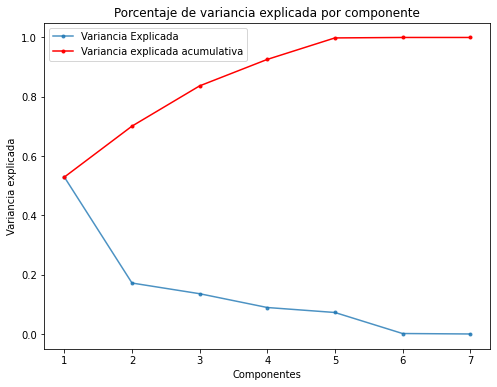

In [21]:
myPCA = PCA().fit(bicicletas_train_standarized[data_columns]);

print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())

fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

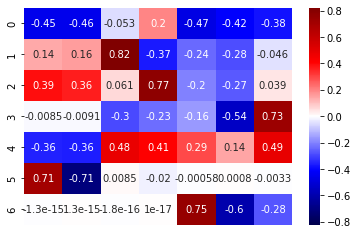

In [31]:
sns.heatmap(myPCA.components_, cmap='seismic', 
            xticklabels=list(bicicletas_train_standarized.columns[2:-0]),
            vmin=-np.max(np.abs(myPCA.components_)),
            vmax=np.max(np.abs(myPCA.components_)),
            annot=True);

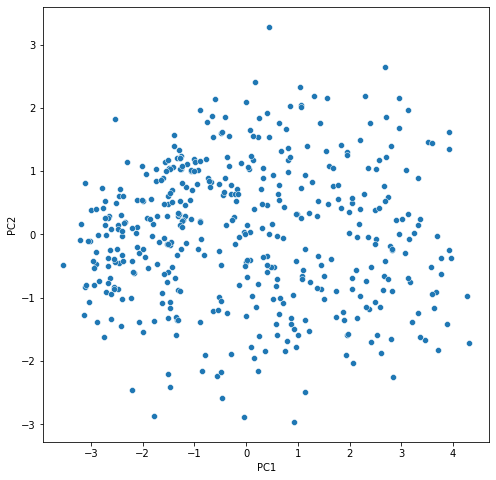

In [34]:
transformed_bicicletas_train = myPCA.transform(bicicletas_train_standarized[data_columns])
bicicletas_train_standarized[['PC1','PC2', 'PC3']] = transformed_bicicletas_train[:,:3]
fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2',  data=bicicletas_train_standarized)

#### c) La variable a predecir es un conteo. En este caso podría tener sentido utilizar un regresor que use un modelo adecuado para este tipo de datos como el $\texttt{PoissonRegressor}$ de scikit-learn. Veréis que tiene un parámetro de regularización $\texttt{alpha}$ que necesitaréis ajustar usando validación cruzada. Con el mejor parámetro de regularización según el error de validación cruzada, ajustad el modelo con los datos de entrenamiento y calculad la $\textit{calidad}$ del modelo con los datos de test.

#### d) A veces el modelo que parece adecuado no lo es tanto después de todo. Ajustad una regresión lineal a los datos y calculad la $\textit{calidad}$ del modelo empleando validación cruzada y con los datos de test.

#### e) Cuando se trata de entender un problema, es útil reducir el número de atributos en el modelo. Ajustad una regresión LASSO (ajustando la regularización usando la versión CV del modelo) y calculad la $\textit{calidad}$ del modelo con los datos de test.

#### f) Ahora podemos analizar y comparar los resultados:
* Comparad los valores pronosticados con los valores reales de los tres modelos y sus calidades. ¿Qué modelo os parece mejor? ¿Por qué?
* Analizad los pesos de la regresión lineal y LASSO. ¿Qué atributos son más importantes? ¿Hay atributos que no son relevantes?
* Comparad las predicciones de la regresión de Poisson y la regresión de LASSO. ¿Hay alguna diferencia en su comportamiento? ¿Qué creéis que está pasando?